In [1]:
%matplotlib inline
IMG_PATH = '/home/russell/projects/flask-heroku-tutorial/data/test/metal/0A8u6kaJqTidwxpJZNe9GF.jpg'

In [24]:
import PIL

In [2]:
from PIL import Image

In [3]:
file = Image.open(IMG_PATH)

In [10]:
from keras import img_to_array

Using TensorFlow backend.


ImportError: cannot import name 'img_to_array'

In [11]:
!pip install keras

In [4]:
from keras.preprocessing.image import img_to_array, ImageDataGenerator

Using TensorFlow backend.


In [5]:
img_array = img_to_array(file)

In [6]:
import numpy as np

In [7]:
np.array(file).shape

(300, 300, 3)

In [8]:
np.array(img_array).shape

(300, 300, 3)

In [9]:
image = np.array(img_array)

In [10]:
image[:, :, 0].flatten()

array([ 237.,  132.,  137., ...,   57.,   57.,   55.], dtype=float32)

In [11]:
R = image[:, :, 0].flatten()
B = image[:, :, 1].flatten()
G = image[:, :, 2].flatten()

In [12]:
np.histogram(R)

(array([  325,  9503, 24934, 10082, 10832,  4996,  3834,  2636,  3313, 19545]),
 array([  17. ,   40.8,   64.6,   88.4,  112.2,  136. ,  159.8,  183.6,
         207.4,  231.2,  255. ]))

In [13]:
import matplotlib.pyplot as plt

([array([ 1.,  4.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  1.]),
  array([ 11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([  1.70000000e+01,   2.50870000e+03,   5.00040000e+03,
          7.49210000e+03,   9.98380000e+03,   1.24755000e+04,
          1.49672000e+04,   1.74589000e+04,   1.99506000e+04,
          2.24423000e+04,   2.49340000e+04]),
 <a list of 2 Lists of Patches objects>)

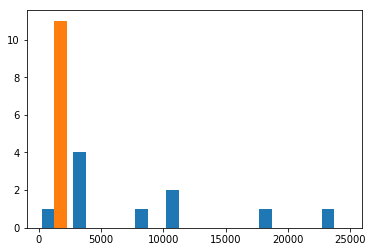

(array([ 10474.,   2764.,   1421.,   4191.,   8275.,  12963.,  14934.,
         12326.,   2810.,  19842.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

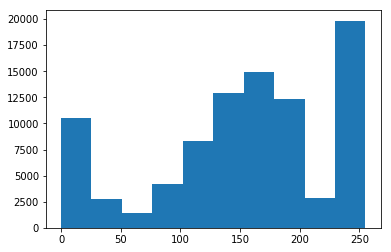

In [15]:
plt.hist(B)

(array([ 29200.,  26712.,   5413.,   1259.,   1343.,   1351.,   1600.,
          1833.,   2432.,  18857.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

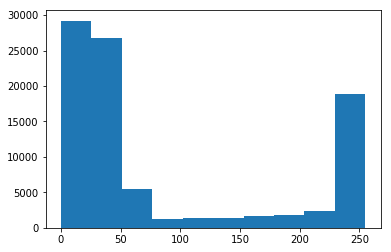

In [16]:
plt.hist(G)

In [19]:
import os

In [20]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [30]:
def images(path):
    R = np.array([])
    B = np.array([])
    G = np.array([])
    for index, file in enumerate(os.listdir(path)):
        img = PIL.Image.open('{}/{}'.format(path, file))
        img_array = np.array(img)
        R = np.append(R, img_array[:, :, 0])
        G = np.append(G, img_array[:, :, 1])
        B = np.append(B, img_array[:, :, 2])
    return (R, B, G)
    

In [36]:
data_path = '/home/russell/projects/flask-heroku-tutorial/data/sample/metal'

In [37]:
R, B, G = images(data_path)

(array([ 490763.,  282780.,  141417.,  113578.,  108387.,   95860.,
          89802.,   82212.,  125361.,  269240.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

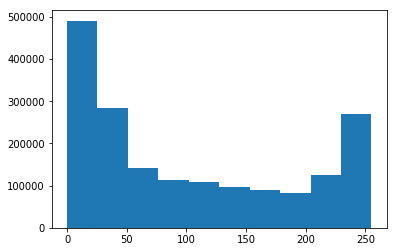

In [38]:
plt.hist(R)

In [39]:
not_metal_path ='/home/russell/projects/flask-heroku-tutorial/data/sample/not-metal'

In [41]:
R_not, B_not, G_not = images(not_metal_path)

(array([ 560215.,  238791.,  137270.,   85220.,   76647.,   87601.,
          68658.,  151285.,  110691.,  273422.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

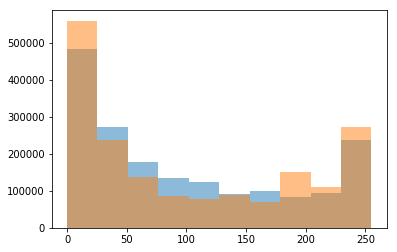

In [45]:
plt.hist(G, alpha=0.5, label="metal")
plt.hist(G_not, alpha=0.5, label="not=metal")

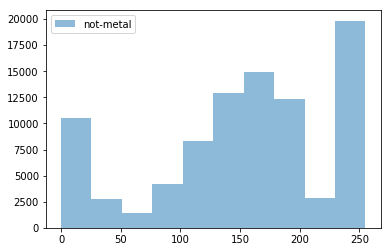

In [111]:
plt.hist(B_not, alpha=0.5, label="not-metal")
plt.legend()
plt.show()